## LESSON 02: FUNDAMENTALS OF ML AND STATISTICAL LEARNING

### 1. Metadata  
A dataset on apartments sold in Russia to predict the price of a property.

- **price**: continuous. In rubles.  
- **date**: date of publication of the announcement.  
- **geo_lat**: continuous. Latitude of apartment coordinates. 
- **geo_lon**: continuous. Longitude of apartment coordinates. 
- **building_type**: categorical, number. Facade type. 0 - Other. 1 - Panel. 2 - Monolithic. 3 - Brick. 4 - Blocky. 5 - Wooden
- **level**: continuous. Apartment floor. 
- **levels**: continuous. Number of storeys.
- **rooms**: continuous. The number of living rooms. If the value is "-1", then it means "studio apartment".
- **area**: continuous. The total area of the apartment.
- **kitchen_area**: continuous. Kitchen area
- **object_type**: categorical, number. Apartment type. 1 - Secondary real estate market; 2 - New building;

In [32]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [33]:
# Define the column names as a list
column_names = ['price', 'date', 'geo_lat', 'geo_lon',
       'building_type', 'level', 'levels', 'rooms', 'area', 'kitchen_area',
       'object_type']

### 2. Load Dataset

In [34]:
dataset = pd.read_csv("seminar.csv")
dataset.head()

,price,date,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type
4469524,4290000,2020-09-29,61.806653,34.338704,3,8,11,3,53.0,9.0,1
275535,2250000,2018-10-15,47.260320,39.690103,3,9,10,2,41.0,7.0,1
804056,1800000,2018-12-24,45.073038,39.000906,3,3,9,1,30.0,6.0,1
1164513,4200000,2019-02-17,55.044792,82.903962,1,8,9,2,46.0,7.0,1
1165645,3680000,2019-02-17,55.058563,82.947420,1,1,10,3,61.0,8.0,1


In [35]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  100000
#Features =  11


In [36]:
# checking the missing values
dataset[dataset.eq("?").any(axis=1)].head()

,price,date,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type


In [37]:
# replace data with '?' by NaN
dataset.replace("?", np.nan, inplace=True)
dataset[dataset.isna().any(axis=1)].head()
print("#Samples with missing values = ", len(dataset[dataset.isna().any(axis=1)]))

#Samples with missing values =  0


Filtering missing values

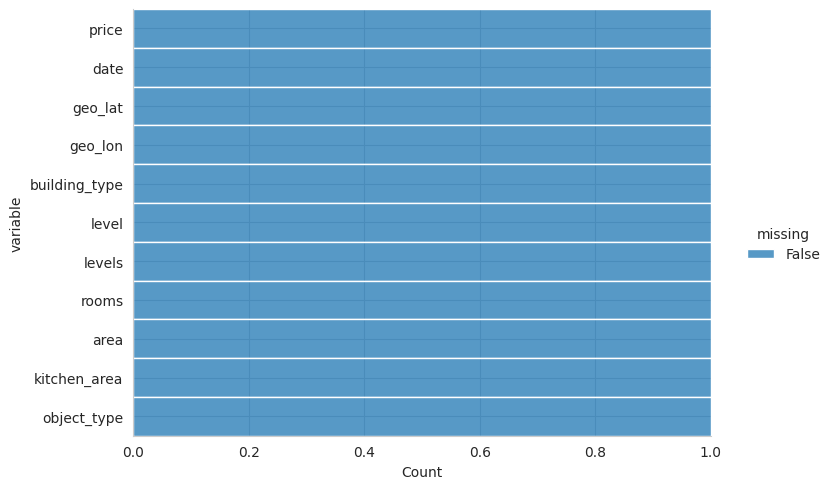

In [38]:
# plot missing data
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)

plt.show()

In [39]:
dataset = dataset.dropna()
print("#Total samples without missing values = ", len(dataset))

#Total samples without missing values =  100000


### 3. Descriptive Statistical Analysis

#### Numerical variables

In [40]:
# list of numerical variables 
numerical_cols = ['price', 'geo_lat', 'geo_lon', 'level', 'levels', 'rooms', 'area', 'kitchen_area']

Histogram with Frequencies

In [41]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)    
    plt.show()

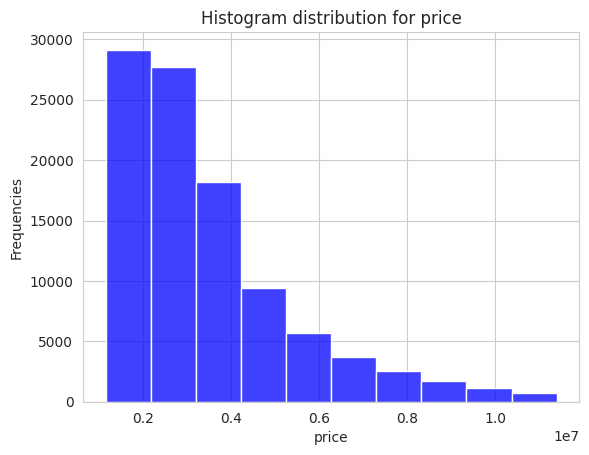

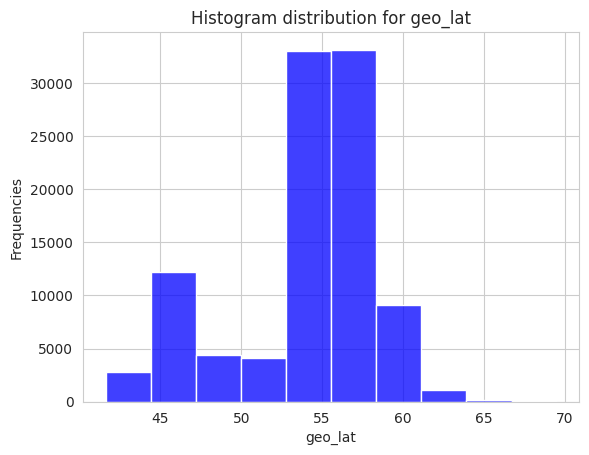

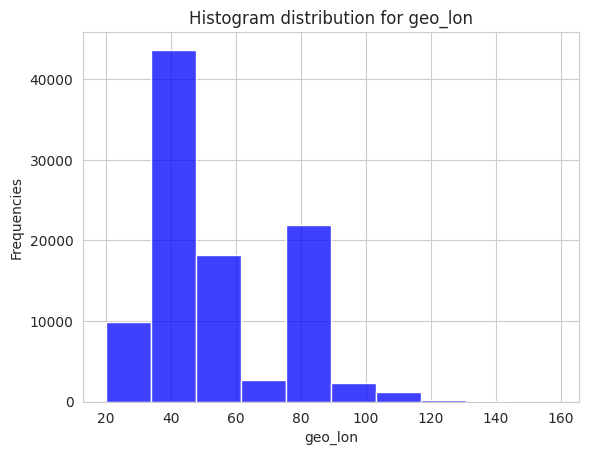

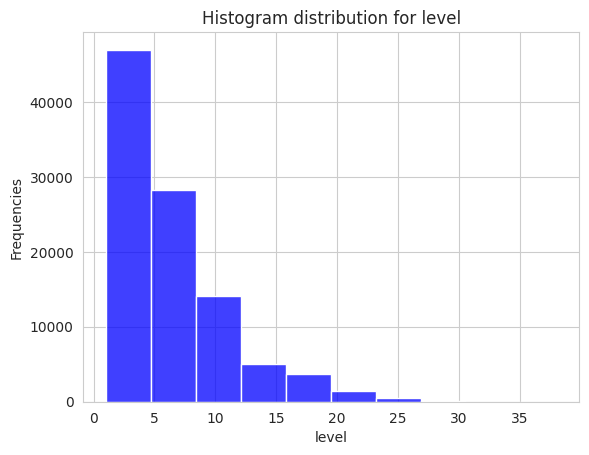

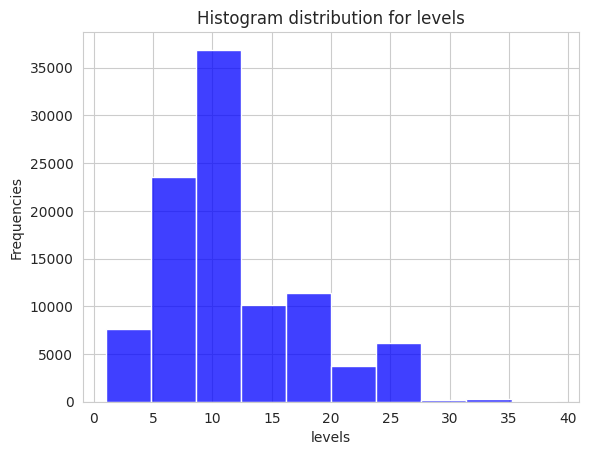

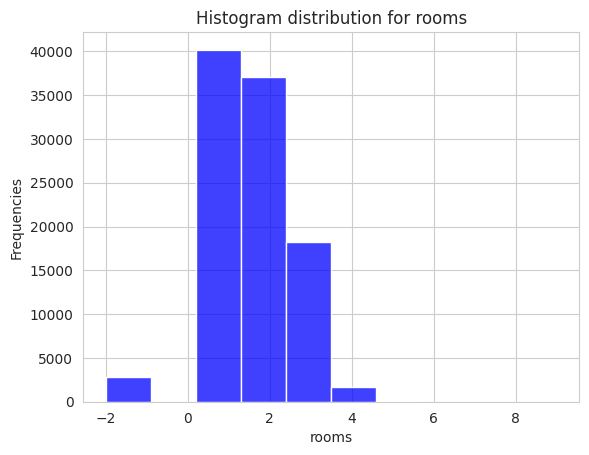

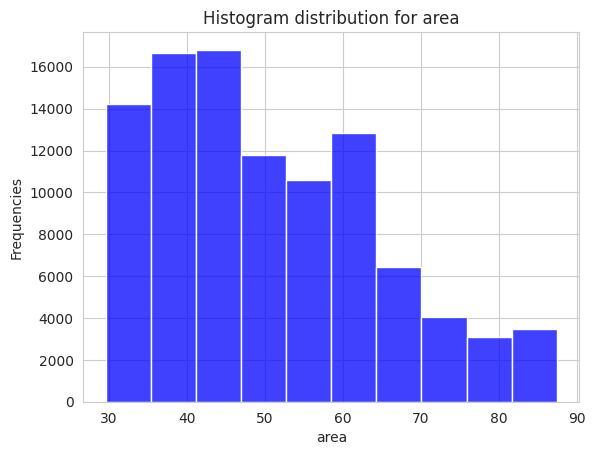

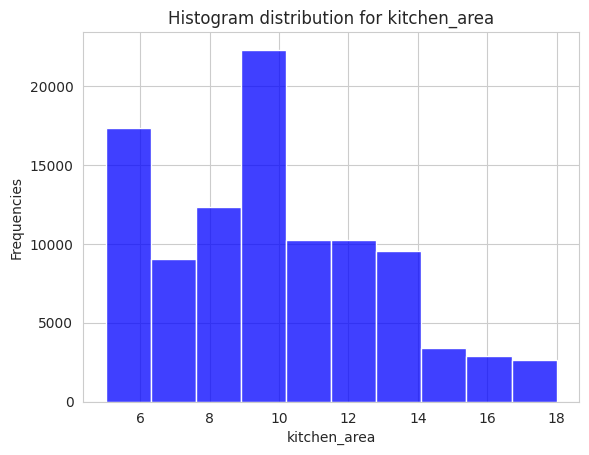

In [42]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_frequencies(dataset, col, 10)

Histogram with Densities and KDE line (kernel density estimate)

The Kernel Density Estimator provides a smooth curve that represents the distribution of data points based on estimating the probability density function of a random variable:  
$$ \hat{f}(x; h) = \frac{1}{n} \sum_{i=1}^{n} K_h(x - X_i) $$  
Where:  
* n: total number of data points
* $X_i$: observed data points
* $K_h$: kernel function scaled by the bandwidth h
$$ K_h(z) = \frac{1}{h} K\left(\frac{z}{h}\right) $$ 
* $K$: Gaussian Kernel  
$$ K(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} $$

In [43]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)    
    plt.show()

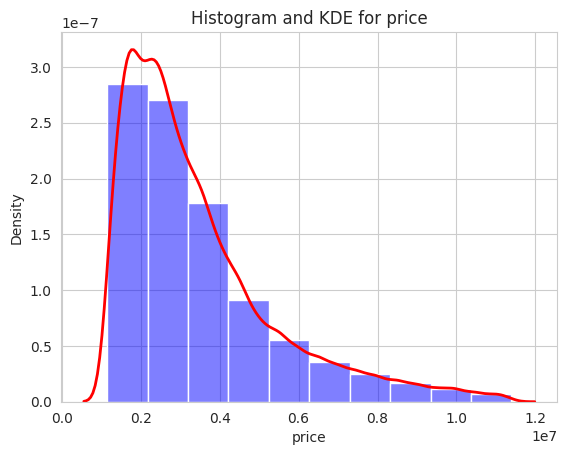

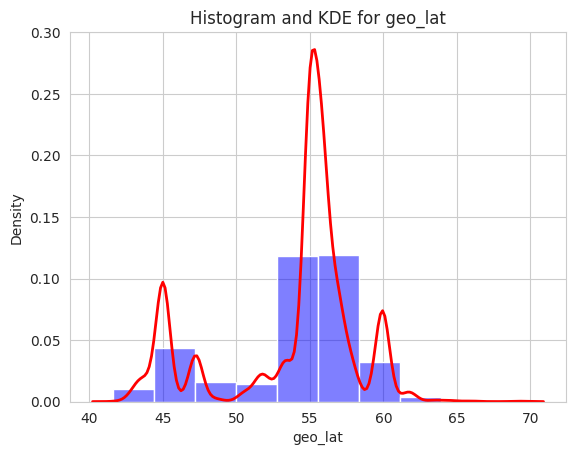

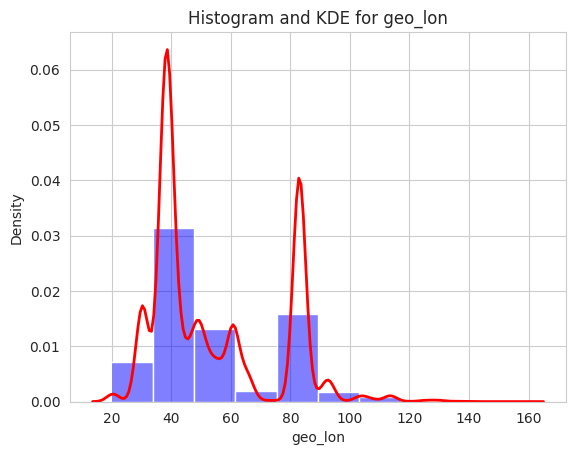

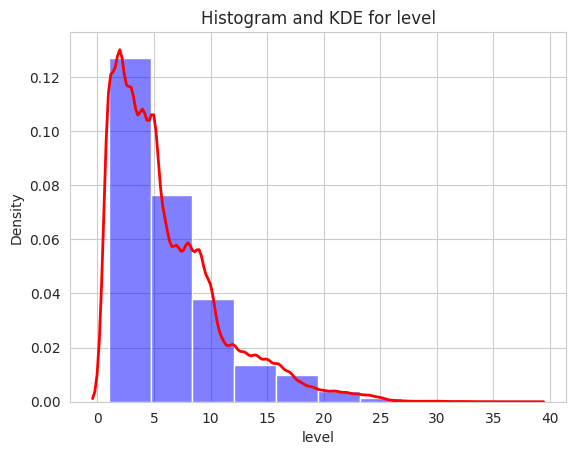

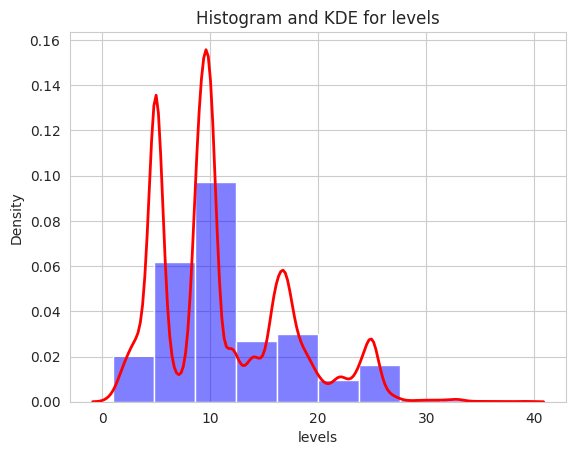

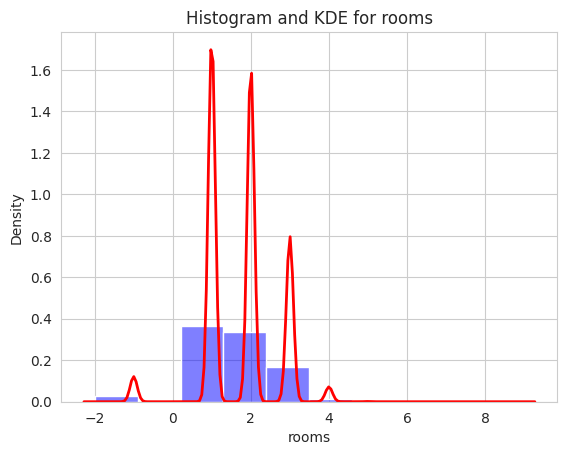

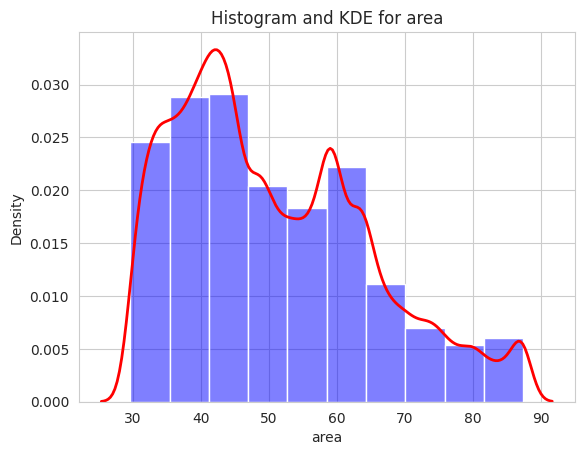

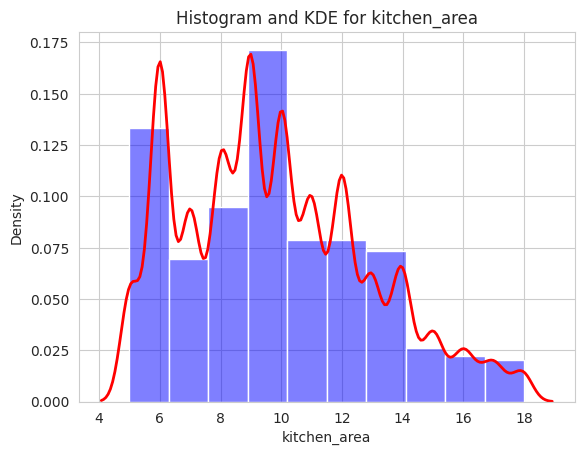

In [44]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(dataset, col, 10)

# Comments on Histograms

1. **Price.**  The density of values decreases in a way resembling Benford's Law or a function like f(n) = A/(n+B).

2. **geo_lat.**  This feature doesn't exhibit much diversity in its values and could potentially be treated as categorical or more discrete.

3. **geo_lon.** Similar to geo_lat.

4. **level.** The density decreases exponentially.

5. **levels.**  Somewhat resembles a normal distribution, but with a dip in the right half of the bell curve.

6. **rooms.** Judging by the density and the KDE line, the `rooms` feature isn't just discrete, but practically categorical.

7. **area.** The majority of values are distributed uniformly.

8. **kitchen.** Resembles a normal distribution. 

Box Plot

In [45]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 3
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

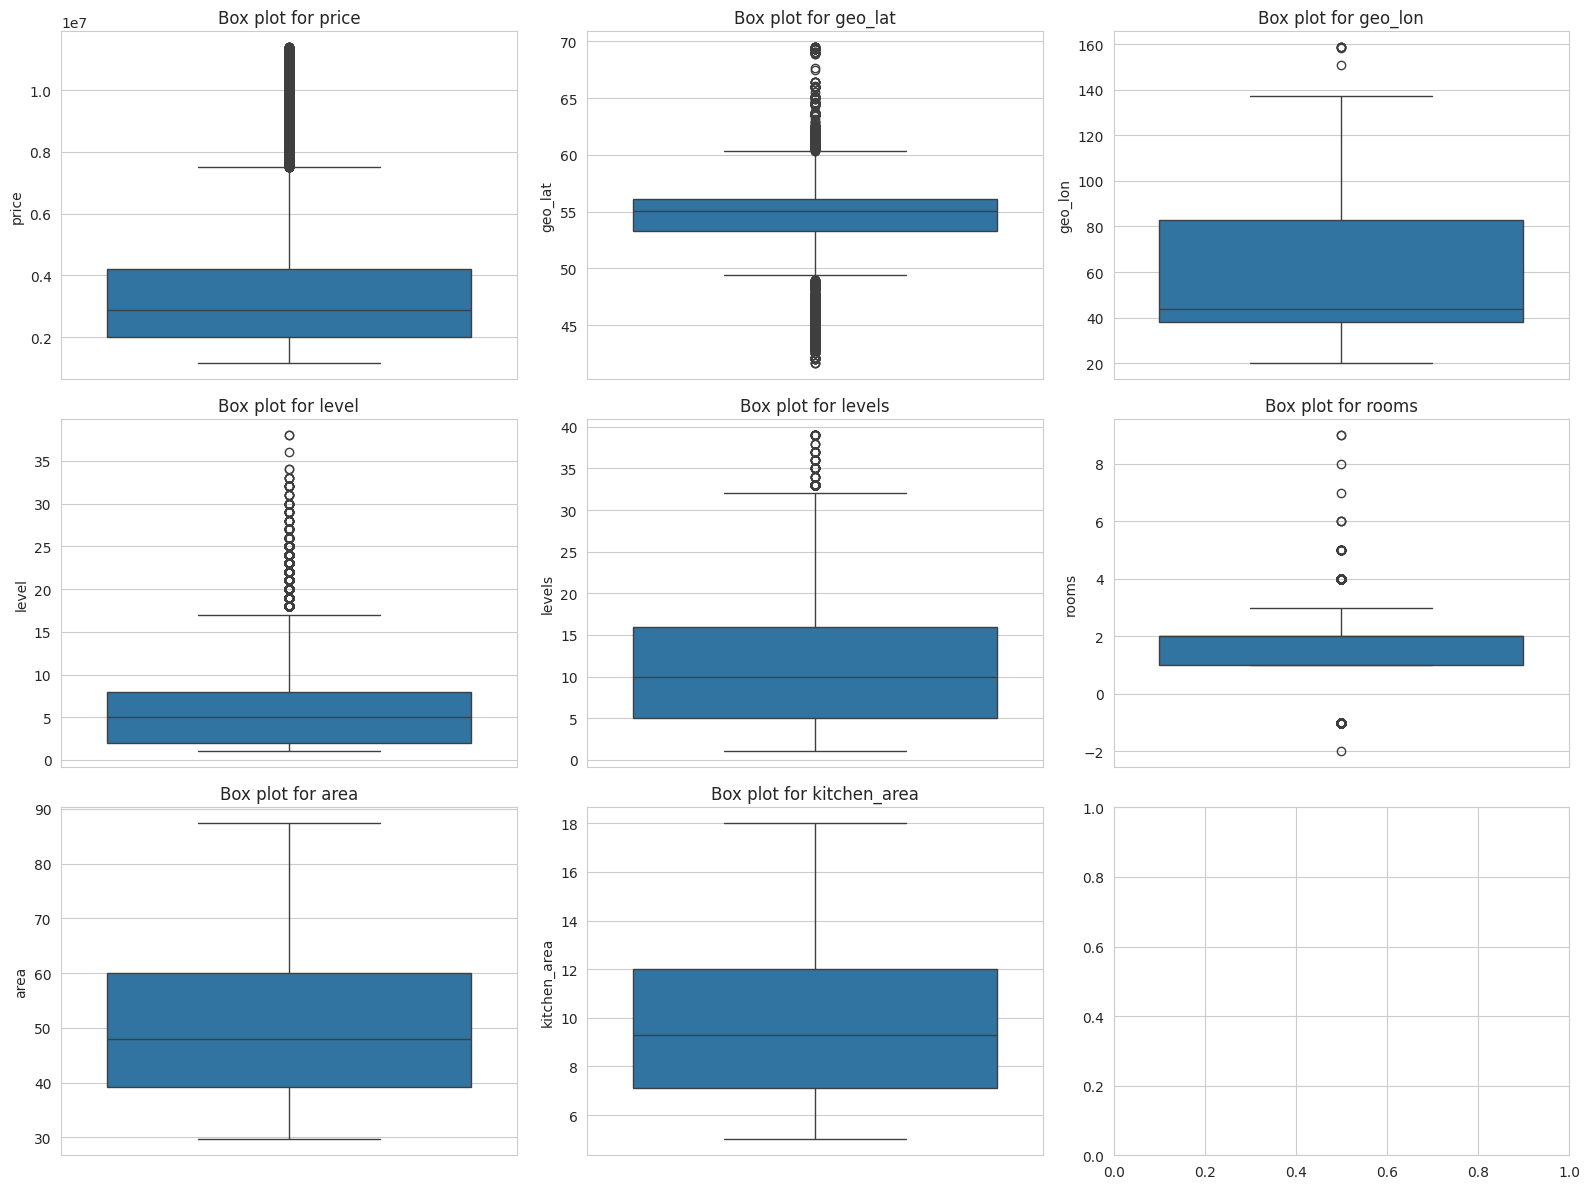

In [46]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

Statistical metrics

In [47]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

,price,geo_lat,geo_lon,level,levels,rooms,area,kitchen_area
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.442065e+06,53.925105,53.869857,6.081400,11.121090,1.731240,50.663959,9.805150
std,1.964558e+06,4.629917,20.907935,4.756808,6.210331,0.912105,14.251681,3.090125
min,1.150000e+06,41.617528,19.906752,1.000000,1.000000,-2.000000,29.600000,5.000000
25%,2.000000e+06,53.325302,37.966688,2.000000,5.000000,1.000000,39.200000,7.100000
50%,2.882378e+06,55.083712,43.953491,5.000000,10.000000,2.000000,48.000000,9.300000
75%,4.200000e+06,56.145175,82.836177,8.000000,16.000000,2.000000,60.000000,12.000000
max,1.139250e+07,69.498493,158.696251,38.000000,39.000000,9.000000,87.390000,18.000000


Correlation Analysis

The correlation between 2 variables quantify the linear relationship between the variables X and Y:  
$$ r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$   
Where:  
  
$r$: pearson correlation coefficient  
$Cov(x, y)$: covariance between variables X and Y. It measures how much the two variables change together.  
$\sigma_X, \sigma_Y$: standard deviations for variables X and Y.  

Formula of Covariance:  
$$ \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $$  
Formula for standard deviation for X:  
$$ \sigma_X = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2} $$  
Formula for standard deviation for Y:  
$$ \sigma_Y = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2} $$  

In [48]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()    
    plt.show()

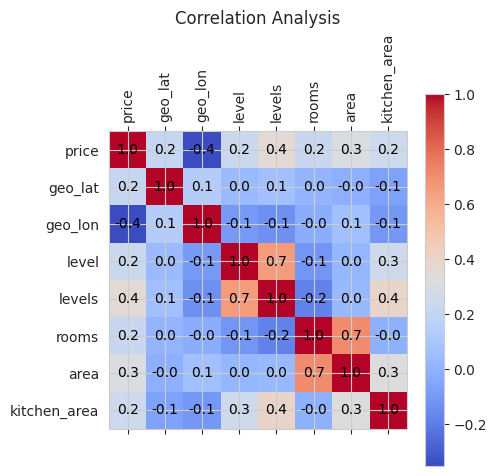

In [49]:
plot_correlation(dataset, numerical_cols)

# Commentary.
We can see that price has medium correlation with geo_lon, levels, area, and weak correlation with other cols.

Implications of Low Correlation

- **Independence of Features**:  
Low correlation suggests that the features are likely independent of each other. 
This can be beneficial because independent features provide unique information to the model, which can improve its performance.
- **Feature Redundancy**:   
When features are not correlated, it reduces the risk of redundancy. 
Including redundant features (highly correlated) can lead to issues like multicollinearity, making it difficult to interpret the model and possibly degrading its performance.
- **Model Complexity**:  
Low correlation may indicate that the model needs to learn more complex relationships to make accurate predictions. 
If features do not provide overlapping information, the model may require more sophisticated techniques (like polynomial regression or interaction terms) to capture the underlying patterns.
- **Feature Selection**:  
In some cases, low-correlation features might be candidates for removal if they do not contribute significantly to the predictive power of the model. 

**Outliers detection using Z-Score**  
The Z-score is the number of standard deviations from the mean that a data point is.  
The formula for the Z-score is:  
$$ Z = \frac{x - \mu}{\sigma} $$

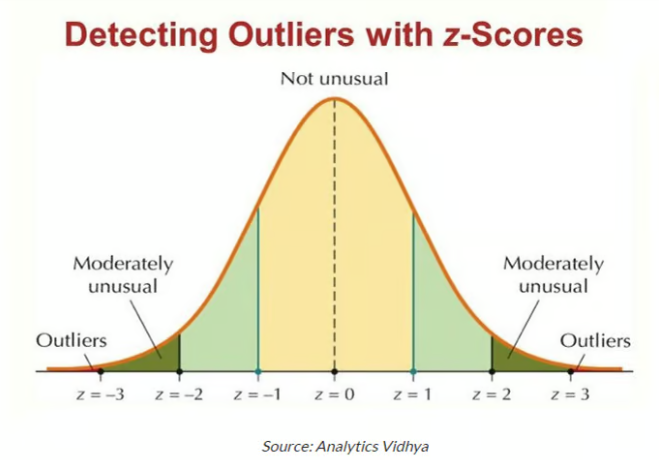

In [50]:
# function to plot gaussian kernel
def plot_gaussian_kernel(mean=0, std_dev=1, num_points=1000):    
    # Generate x values
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, num_points)
    
    # Calculate the Gaussian kernel values
    gaussian_kernel = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, gaussian_kernel, color='blue', label=f'Gaussian Kernel\nMean = {mean}, Std Dev = {std_dev}')
    plt.title('Gaussian Kernel')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.grid()
    plt.show()

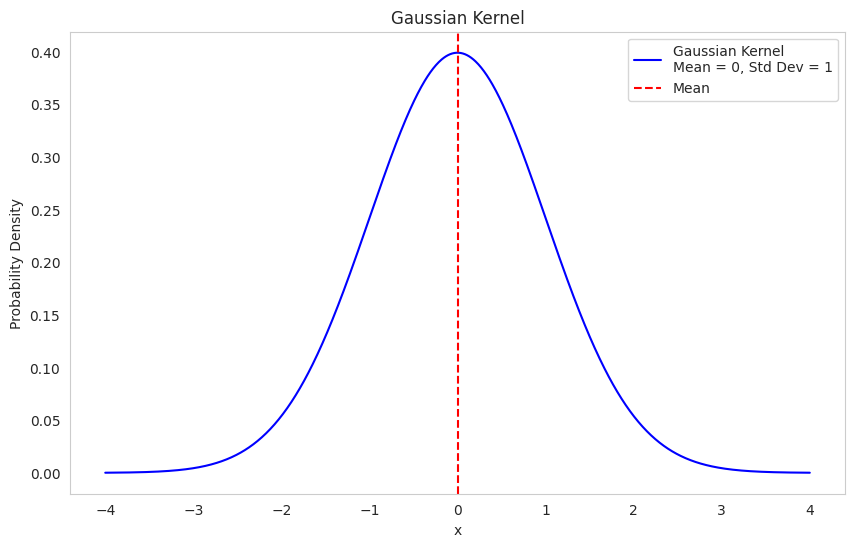

In [51]:
# standard gaussian kernel
plot_gaussian_kernel(mean=0, std_dev=1)

In [52]:
from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile


In [53]:
call_percentile(z = -2)

2.275

In [54]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)
    
    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    return outliers

In [55]:
outliers_detection(dataset, "kitchen_area").head()

,price,date,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type
4510889,11118347,2020-10-04,55.697057,37.624049,2,13,24,1,36.8,17.9,11
846203,8773880,2018-12-30,55.541206,37.486610,1,15,18,3,80.2,17.5,11
3488845,6250000,2020-03-26,59.829317,30.180708,1,4,5,3,58.2,18.0,1
4006730,2550000,2020-07-01,54.854979,82.972161,3,4,5,3,51.0,18.0,1
5055940,3690000,2021-02-21,57.145450,65.655635,3,2,9,1,52.2,17.3,1


In [56]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in price ***
#samples outlier to distribution = 4126
%outliers = 4.13 %

*** Outliers detection in geo_lat ***
#samples outlier to distribution = 4543
%outliers = 4.54 %

*** Outliers detection in geo_lon ***
#samples outlier to distribution = 4548
%outliers = 4.55 %

*** Outliers detection in level ***
#samples outlier to distribution = 1953
%outliers = 1.95 %

*** Outliers detection in levels ***
#samples outlier to distribution = 3224
%outliers = 3.22 %

*** Outliers detection in rooms ***
#samples outlier to distribution = 1674
%outliers = 1.67 %

*** Outliers detection in area ***
#samples outlier to distribution = 4529
%outliers = 4.53 %

*** Outliers detection in kitchen_area ***
#samples outlier to distribution = 1633
%outliers = 1.63 %


#### Categorical Variables

In [57]:
# list of categorical variables
categorical_vars = list(set(dataset.columns) - set(numerical_cols))
categorical_vars

['date', 'object_type', 'building_type']

Count instances for each categorical column

In [58]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** date ******
date
2020-03-27    837
2019-02-28    423
2020-02-01    412
2019-04-01    378
2020-09-01    378
             ... 
2020-08-15      6
2018-04-09      1
2018-08-31      1
2018-04-05      1
2018-03-06      1
Name: count, Length: 970, dtype: int64

***** object_type ******
object_type
1     72438
11    27562
Name: count, dtype: int64

***** building_type ******
building_type
1    38810
3    34300
2    18057
0     5381
4     3256
5      196
Name: count, dtype: int64


Bar chart - Analysis of absolute frequencies

In [59]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

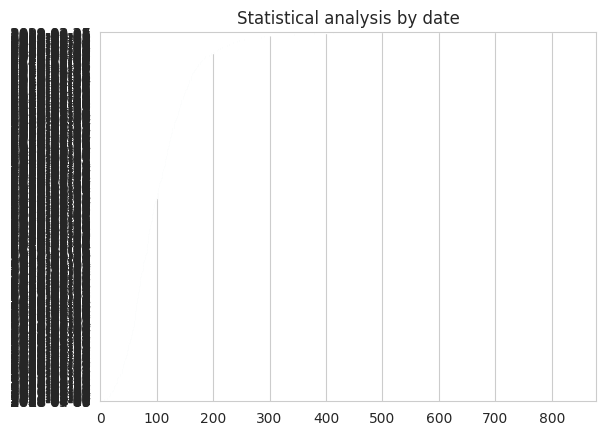

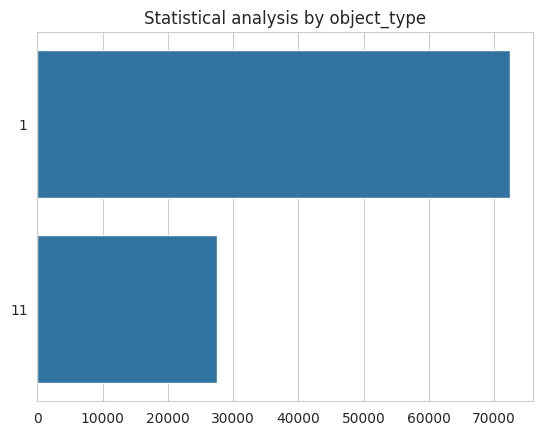

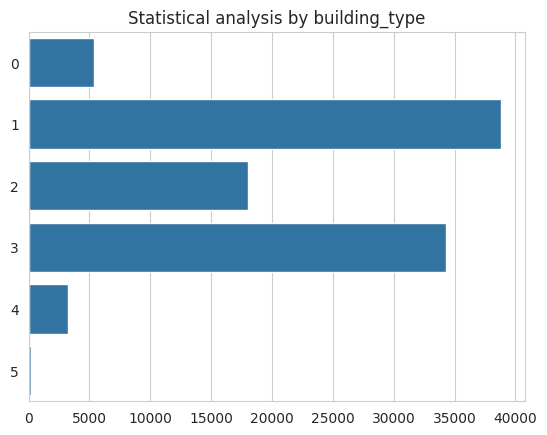

In [61]:
# cycle to plot bar chart for each categorical column
for col in categorical_vars:
    plot_barchart(dataset, col)

# Comments on Charts

1. **date.** By strange reasons my notebook doesn't plot diagramm, but there was an interesting distribution, resembling a parabola or sigmoid curve.
   
2. **object_type.** The first type is significantly more popular in the dataset.

3. **building_type.** It resembles a normal distribution, but in reality, this likely indicates that only two or three values have a significant influence on the dataset.


Pie Chart - Analysis of relative frequencies

In [62]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

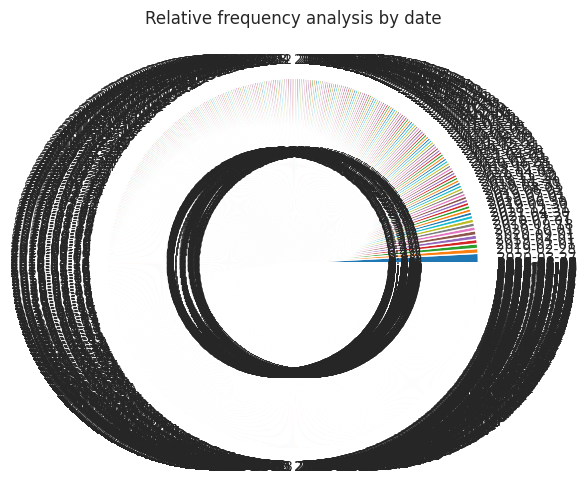

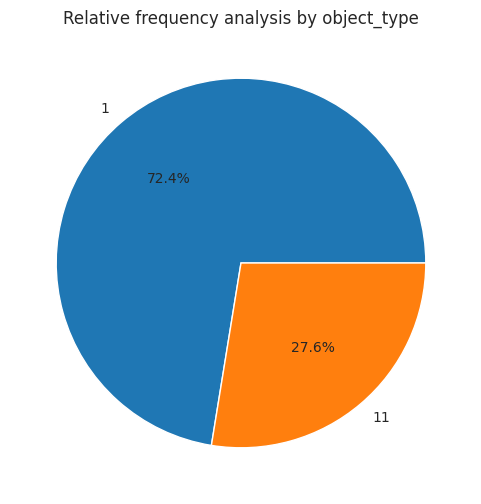

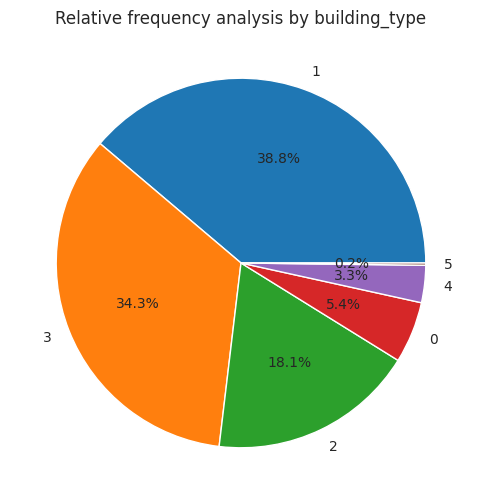

In [63]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

# Comments on Charts

1. **date.** The method doesn't seem to be performing very effectively on this feature due to the large number of values. However, certain values still appear to be dominant.

2. **object_type.** We now know that there are three times as many properties on the secondary market as there are new buildings.

3. **building_type.** As previously mentioned, two or three values dominate.

Statistical Analysis for subgroups 

In [81]:
# create groups organized by object_type and building_type
group_object_type_building_type = dataset.groupby(["object_type", "building_type"]).size().reset_index(name = "samples")
print(group_object_type_building_type)

    object_type  building_type  samples
0             1              0     2831
1             1              1    28544
2             1              2     9015
3             1              3    29000
4             1              4     2856
5             1              5      192
6            11              0     2550
7            11              1    10266
8            11              2     9042
9            11              3     5300
10           11              4      400
11           11              5        4


In [82]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('object_type')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by object_type and building_type')
    plt.tight_layout()
    plt.show()

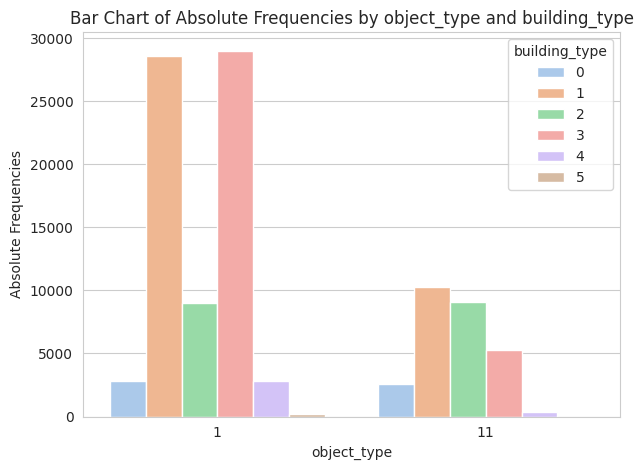

In [83]:
plot_absfreq_groups(group_object_type_building_type, "object_type","building_type")

In [84]:
# function to plot relative frequencies for groups
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " with building_type " + group[g2]
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by object_type and building_type')
    plt.show()

In [85]:
plot_relfreq_groups(group_object_type_building_type, "object_type","building_type")

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U20')) -> None